In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [5]:
print("Dataset Shape:", df.shape)
print("Target Distribution:\n", df["stroke"].value_counts())

Dataset Shape: (5110, 12)
Target Distribution:
 stroke
0    4861
1     249
Name: count, dtype: int64


In [6]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
cat_features = [i for i, col in enumerate(X.columns) if X[col].dtype == "object"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [10]:
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    verbose=0
)

In [11]:
model.fit(X_train, y_train, cat_features=cat_features)

In [12]:
pred = model.predict(X_test)

In [13]:
print("Accuracy:", accuracy_score(y_test, pred))
print("\nClassification Report:")
print(classification_report(y_test, pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, pred))


Accuracy: 0.9452054794520548

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022

Confusion Matrix:
[[966   6]
 [ 50   0]]


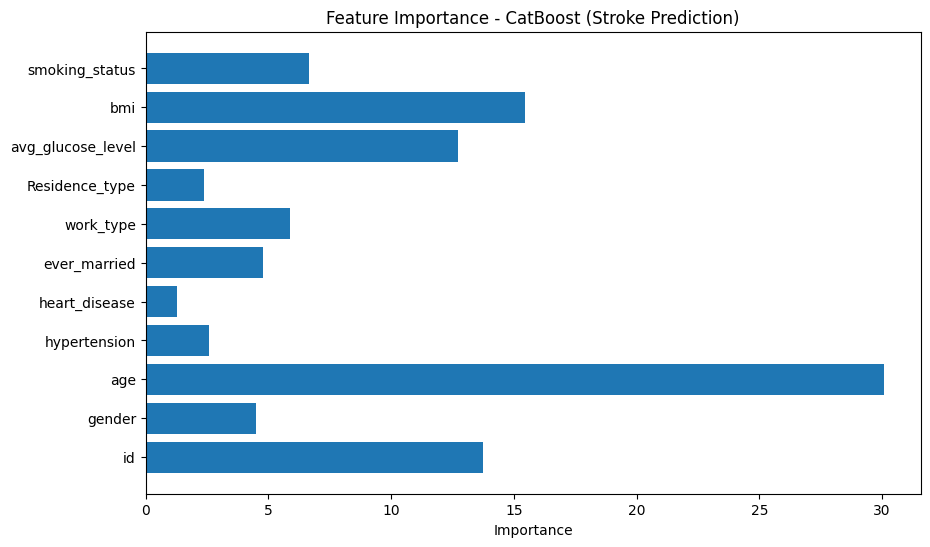

In [16]:
feature_importance = model.get_feature_importance()
feature_names = X.columns

plt.figure(figsize=(10,6))
plt.barh(feature_names, feature_importance)
plt.xlabel("Importance")
plt.title("Feature Importance - CatBoost (Stroke Prediction)")
plt.show()